In [1]:
# LSTM for closing bitcoin price with regression framing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import os

#Files
from util import fetchOnlineData

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-1):
        dataX.append(dataset[i])
        dataY.append(dataset[i + 1])
    return np.asarray(dataX), np.asarray(dataY)
# fix random seed for reproducibility
np.random.seed(7)

# Initial variables

In [3]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

# Importing dataset

In [4]:
yesterday = dt.date.today() - dt.timedelta(1)
dataset = fetchOnlineData(start_d, symbol, yesterday, del_cols=False)

[*********************100%***********************]  1 of 1 downloaded


In [5]:
# load the dataset
df = dataset.drop(['Open','High','Low','Volume', 'Close'], axis=1)
dataset = df.values
dataset = dataset.astype('float32')

In [6]:
dataset.size

253

In [7]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [8]:
#prepare the X and Y label
X,y = create_dataset(dataset)
#Take 80% of data as the training sample and 20% as testing sample
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, shuffle=False)

In [9]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.fit(trainX, trainY, epochs=5, batch_size=1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
 - 2s - loss: 0.1542
Epoch 2/5
 - 0s - loss: 0.0449
Epoch 3/5
 - 0s - loss: 0.0278
Epoch 4/5
 - 0s - loss: 0.0220
Epoch 5/5
 - 1s - loss: 0.0167


In [12]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(type(testPredict))
futurePredict = model.predict(np.asarray([[testPredict[-1]]]))
futurePredict = scaler.inverse_transform(futurePredict)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

<class 'numpy.ndarray'>


In [13]:
print("Price for last 5 days: ")
print(testPredict[-5:])
print("Price for tomorrow: ", futurePredict)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Price for last 5 days: 
[[72.64243 ]
 [72.475105]
 [73.35934 ]
 [72.07274 ]
 [72.52533 ]]
Price for tomorrow:  [[71.037796]]
Train Score: 3.17 RMSE
Test Score: 2.10 RMSE


In [33]:
# Save model for later use
model.save('./lstm_model')

In [15]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPredict)+1, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict):len(dataset)-1, :] = testPredict


In [16]:
# Create final dataframe
index = df.index
comp = pd.DataFrame(index=index)
comp['Real price'] = scaler.inverse_transform(dataset)
comp['Train Pred'] = trainPredictPlot
comp['Test Pred'] = testPredictPlot                                              

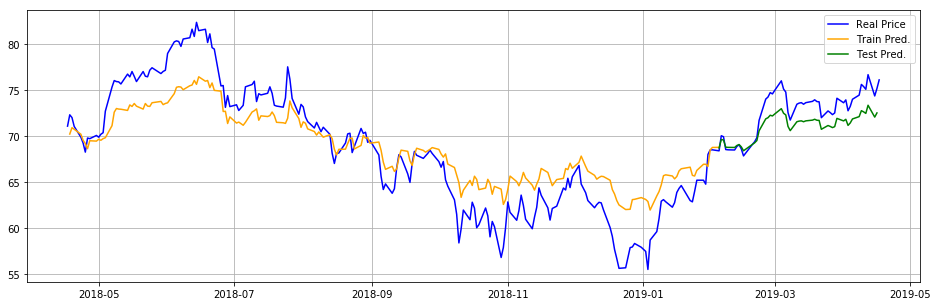

In [17]:
plt.figure(figsize=(16,5))
plt.plot(comp['Real price'], color='blue', label='Real Price')
plt.plot(comp['Train Pred'], color='orange', label='Train Pred.')
plt.plot(comp['Test Pred'], color='green', label='Test Pred.')

plt.legend()
plt.grid()
plt.show()

In [18]:
type(testPredict)

numpy.ndarray

# Future predictions

In [19]:
#load_model
model = load_model('./lstm_model')

In [20]:
# Next Bussiness day

start= dt.date.today().strftime("%Y-%m-%d")
rng = pd.date_range(pd.Timestamp(start),
                    periods=7, freq='B')
a = rng.strftime('%Y-%m-%d %H:%M:%S')

print(a[0])


2019-04-18 00:00:00


# Initial variables

In [21]:
symbol = "AABA"

# We'll look back 365 days
start_d = dt.date.today() - dt.timedelta(365)

# Importing dataset

In [22]:
yesterday = dt.date.today() - dt.timedelta(1)
dataset = fetchOnlineData(start_d, symbol, yesterday, del_cols=False)

[*********************100%***********************]  1 of 1 downloaded


In [23]:
# load the dataset
df = dataset.drop(['Open','High','Low','Volume', 'Close'], axis=1)
dataset = df.values
dataset = dataset.astype('float32')

In [24]:
dataset.size

253

In [25]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [26]:
#prepare the X and Y label
X,y = create_dataset(dataset)
#Take 80% of data as the training sample and 20% as testing sample
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.20, shuffle=False)

In [27]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
testPredict = model.predict(testX)

In [29]:
futurePredict = model.predict(np.asarray([[testPredict[-1]]]))
futurePredict = scaler.inverse_transform(futurePredict)

In [30]:
futurePredict.item(0)

71.03779602050781

In [26]:
from alpha_vantage.timeseries import TimeSeries
from pprint import pprint
key='477OAZQ4753FSGAI'
ts = TimeSeries(key=key)
ts = TimeSeries(key=key,retries='4')
ts = TimeSeries(key=key, output_format='pandas')

data, meta_data = ts.get_daily_adjusted(symbol='MSFT', outputsize='full')

In [29]:
print(data.head(2))

            1. open  2. high    3. low  4. close  5. adjusted close  \
date                                                                  
2019-04-17   121.24   121.85  120.5400    121.77             121.77   
2019-04-18   122.19   123.52  121.3018    123.37             123.37   

             6. volume  7. dividend amount  8. split coefficient  
date                                                              
2019-04-17  19300938.0                 0.0                   1.0  
2019-04-18  27363106.0                 0.0                   1.0  


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5358 entries, 1998-01-02 to 2019-04-18
Data columns (total 8 columns):
1. open                 5358 non-null float64
2. high                 5358 non-null float64
3. low                  5358 non-null float64
4. close                5358 non-null float64
5. adjusted close       5358 non-null float64
6. volume               5358 non-null float64
7. dividend amount      5358 non-null float64
8. split coefficient    5358 non-null float64
dtypes: float64(8)
memory usage: 376.7+ KB
